In [ ]:
Problem Statement
Access to safe drinking-water is essential to health, a basic human right and a component of effective policy for health protection. This is important as a health and development issue at a national, regional and local level. In some regions, it has been shown that investments in water supply and sanitation can yield a net economic benefit, since the reductions in adverse health effects and health care costs outweigh the costs of undertaking the interventions.

Task 1

Predict if water is safe for human consumption or not
ph: pH of 1. water (0 to 14).
Hardness: Capacity of water to precipitate soap in mg/L.
Solids: Total dissolved solids in ppm.
Chloramines: Amount of Chloramines in ppm.
Sulfate: Amount of Sulfates dissolved in mg/L.
Conductivity: Electrical conductivity of water in μS/cm.
Organic_carbon: Amount of organic carbon in ppm.
Trihalomethanes: Amount of Trihalomethanes in μg/L.
Turbidity: Measure of light emiting property of water in NTU.
Potability: Indicates if water is safe for human consumption. Potable -1 and Not potable -0

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv("water_potability.csv")
df.head()

In [ ]:
ph	Hardness	Solids	Chloramines	Sulfate	Conductivity	Organic_carbon	Trihalomethanes	Turbidity	Potability
0	NaN	204.890455	20791.318981	7.300212	368.516441	564.308654	10.379783	86.990970	2.963135	0
1	3.716080	129.422921	18630.057858	6.635246	NaN	592.885359	15.180013	56.329076	4.500656	0
2	8.099124	224.236259	19909.541732	9.275884	NaN	418.606213	16.868637	66.420093	3.055934	0
3	8.316766	214.373394	22018.417441	8.059332	356.886136	363.266516	18.436524	100.341674	4.628771	0
4	9.092223	181.101509	17978.986339	6.546600	310.135738	398.410813	11.558279	31.997993	4.075075	0


In [ ]:
df.shape

In [ ]:
(3276, 10)

In [ ]:
df.info()

In [ ]:
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB

In [ ]:
df.describe()

In [ ]:
ph	Hardness	Solids	Chloramines	Sulfate	Conductivity	Organic_carbon	Trihalomethanes	Turbidity	Potability
count	2785.000000	3276.000000	3276.000000	3276.000000	2495.000000	3276.000000	3276.000000	3114.000000	3276.000000	3276.000000
mean	7.080795	196.369496	22014.092526	7.122277	333.775777	426.205111	14.284970	66.396293	3.966786	0.390110
std	1.594320	32.879761	8768.570828	1.583085	41.416840	80.824064	3.308162	16.175008	0.780382	0.487849
min	0.000000	47.432000	320.942611	0.352000	129.000000	181.483754	2.200000	0.738000	1.450000	0.000000
25%	6.093092	176.850538	15666.690297	6.127421	307.699498	365.734414	12.065801	55.844536	3.439711	0.000000
50%	7.036752	196.967627	20927.833607	7.130299	333.073546	421.884968	14.218338	66.622485	3.955028	0.000000
75%	8.062066	216.667456	27332.762127	8.114887	359.950170	481.792304	16.557652	77.337473	4.500320	1.000000
max	14.000000	323.124000	61227.196008	13.127000	481.030642	753.342620	28.300000	124.000000	6.739000	1.000000

In [ ]:
sns.countplot(x='Potability',data=df )

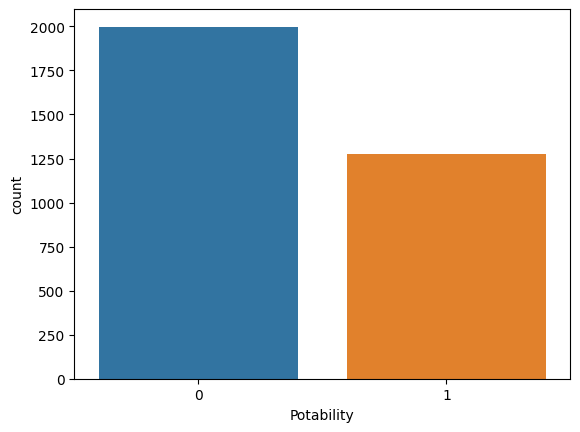

In [ ]:
df["Potability"].value_counts()

In [ ]:
0    1998
1    1278
Name: Potability, dtype: int64

In [ ]:
print(f"0 : {round(1998 /3276 * 100 , 2)}")
print(f"1 : {round(1278 /3276 * 100 , 2)}")

In [ ]:
0 : 60.99
1 : 39.01

In [ ]:
This is not a imbalanced dataset as we have 60:40 ratio of two classes

EDA and Feature Engineering

In [ ]:
df.isnull().sum()

In [ ]:
ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [ ]:
for feature in df.columns:
    if df[feature].isnull().sum()>0:
        print(f"{feature} : {round(df[feature].isnull().mean(),4)*100}%")

In [ ]:
ph : 14.99%
Sulfate : 23.84%
Trihalomethanes : 4.95%

In [ ]:
## Fill missing values with median
for feature in df.columns:
    df[feature].fillna(df[feature].median() , inplace = True)

In [ ]:
## find dublicate rows in dataset
duplicate = df[df.duplicated()]
duplicate

In [ ]:
ph	Hardness	Solids	Chloramines	Sulfate	Conductivity	Organic_carbon	Trihalomethanes	Turbidity	Potability


In [ ]:
for i in df.columns:
    print(f" {i}  :  {len(df[i].unique())}")

In [ ]:
for i in df.columns:
    print(f" {i}  :  {len(df[i].unique())}")

In [ ]:
for feature in df.columns:
    if feature == "Potability":
        pass
    else: 
        bar = sns.histplot(df[feature] , kde_kws = {'bw' : 1} , )
        bar.legend(["Skewness: {:0.2f}".format(df[feature].skew())])
        plt.xlabel(feature)
        plt.ylabel("Probability density")
        plt.title(feature)
        plt.show()

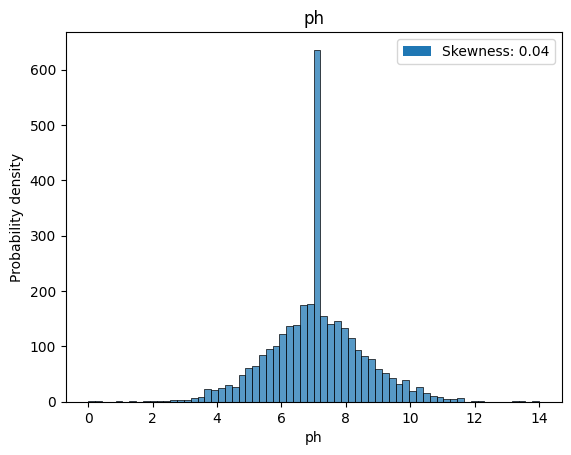

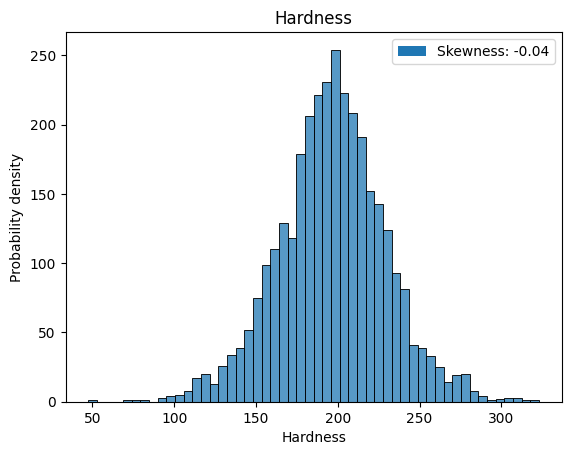

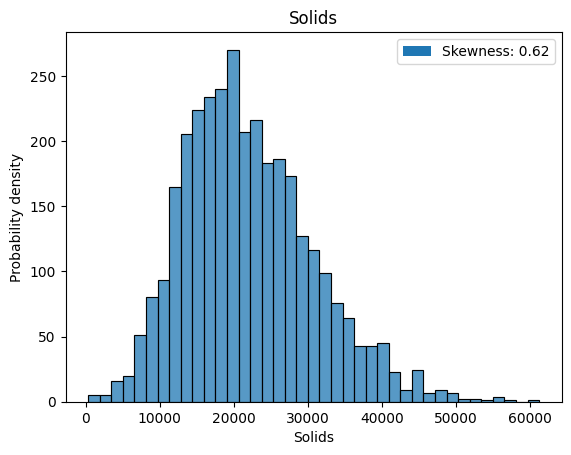

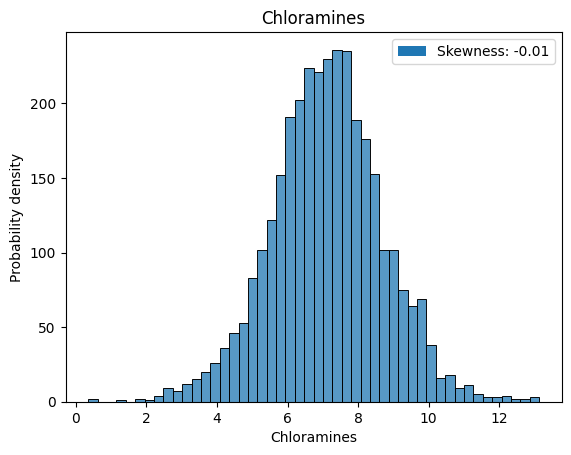

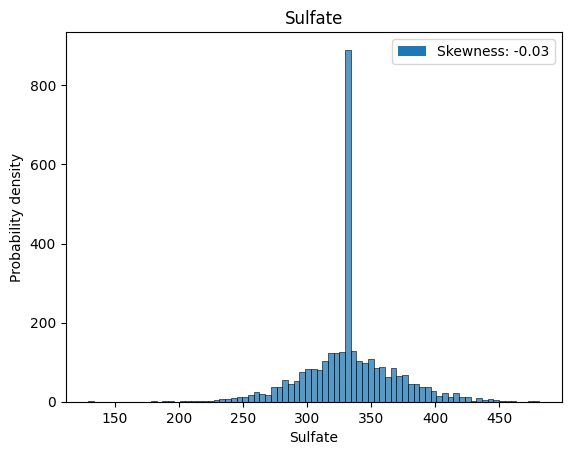

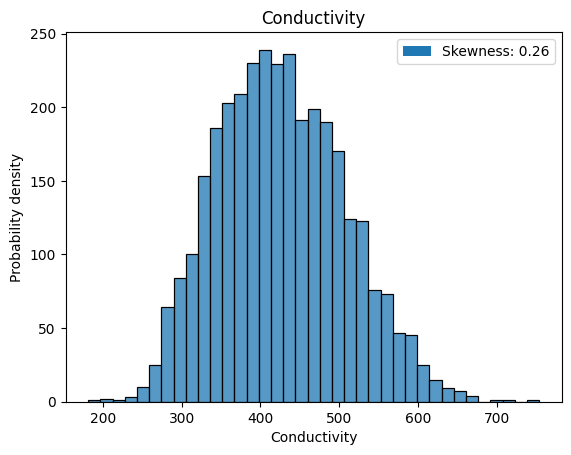

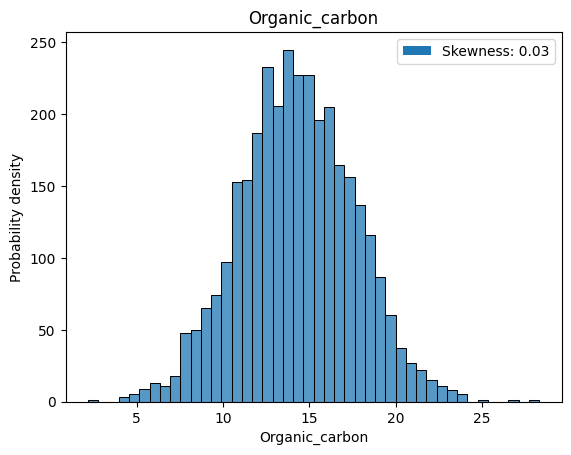

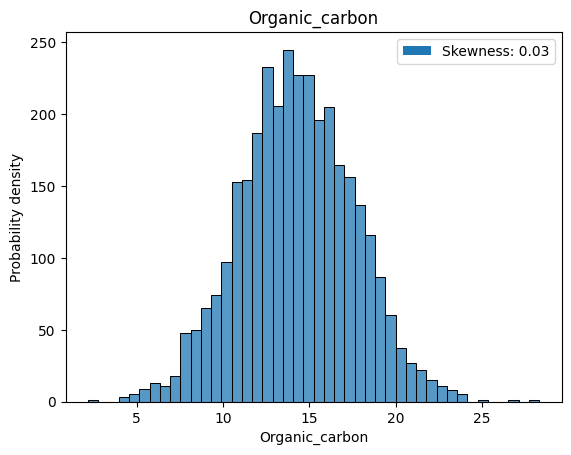

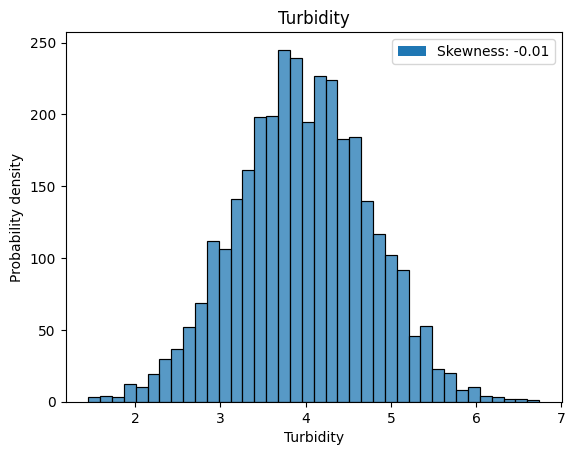

In [ ]:
# we don't have missing values in our dataset so we can skip if condition 
for feature in df.columns:
    if 0 in df[feature].unique():# because log 0 is not defined thats why we are using this condition or we can also use log1p
        pass
    else:
        df.boxplot(column=feature)
        plt.ylabel(feature)
        plt.title(feature)
        plt.show()           

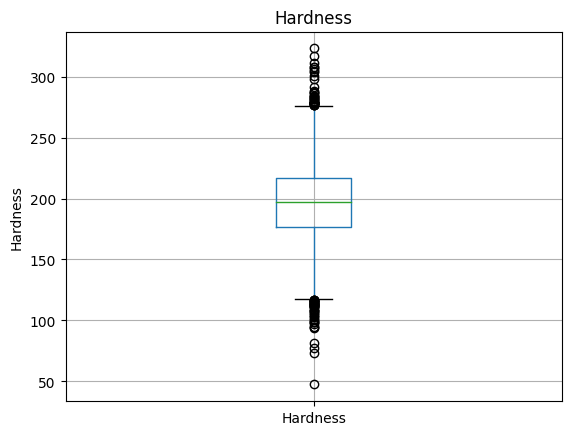

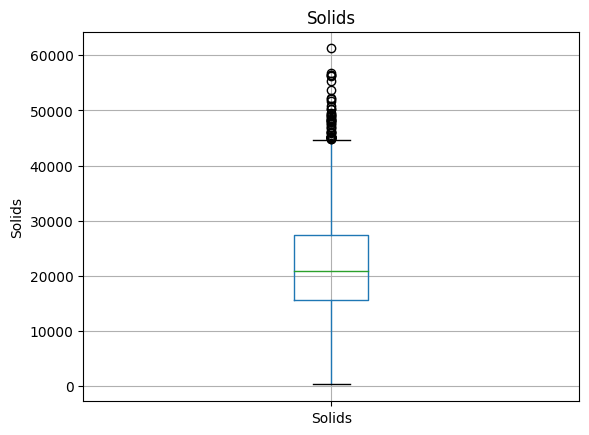

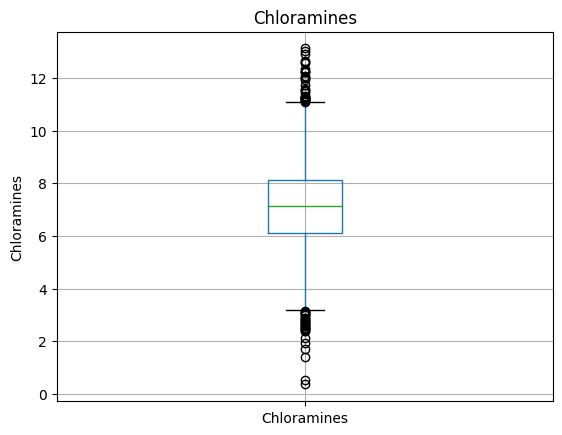

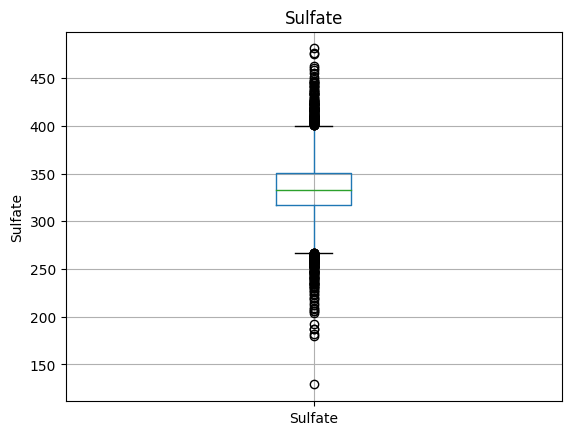

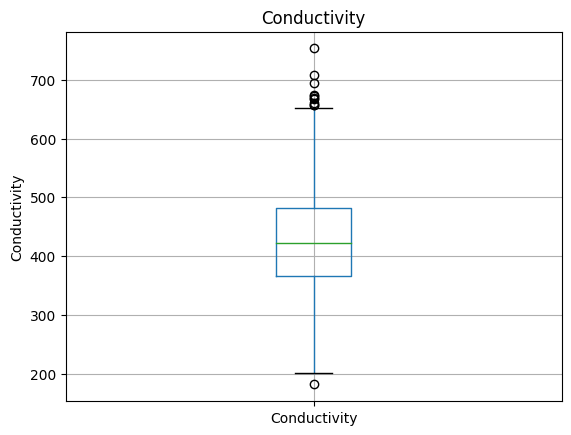

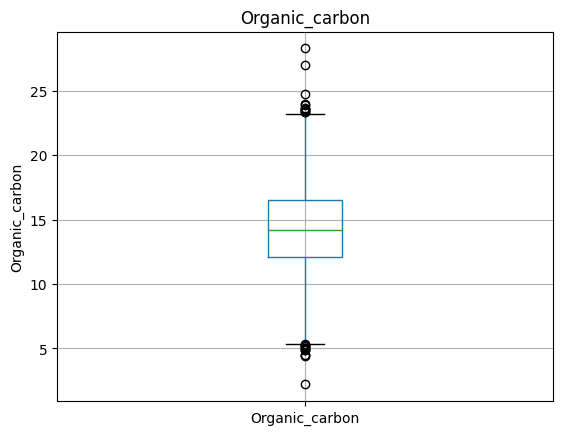

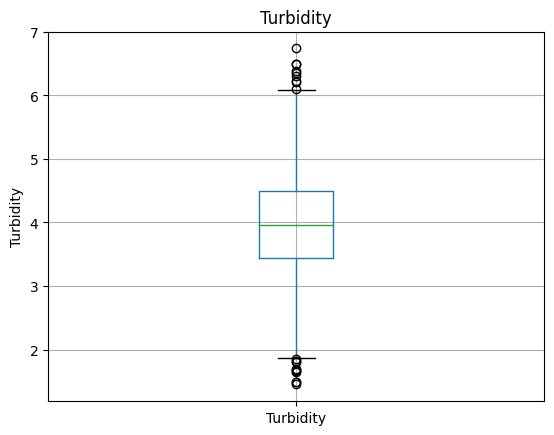

In [ ]:
# removing outliers
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

In [ ]:
ph                     1.592377
Hardness              39.816918
Solids             11666.071830
Chloramines            1.987466
Sulfate               33.291119
Conductivity         116.057890
Organic_carbon         4.491850
Trihalomethanes       20.018954
Turbidity              1.060609
Potability             1.000000
dtype: float64


In [ ]:
df = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]
df.shape

In [ ]:
(2666, 10)

In [ ]:
df["Potability"].value_counts()

In [ ]:
0    1671
1     995
Name: Potability, dtype: int64

In [ ]:
## Correlation
plt.figure(figsize=(25,25))
ax = sns.heatmap(df.corr(), cmap = "coolwarm", annot=True, linewidth=2)

![image.png](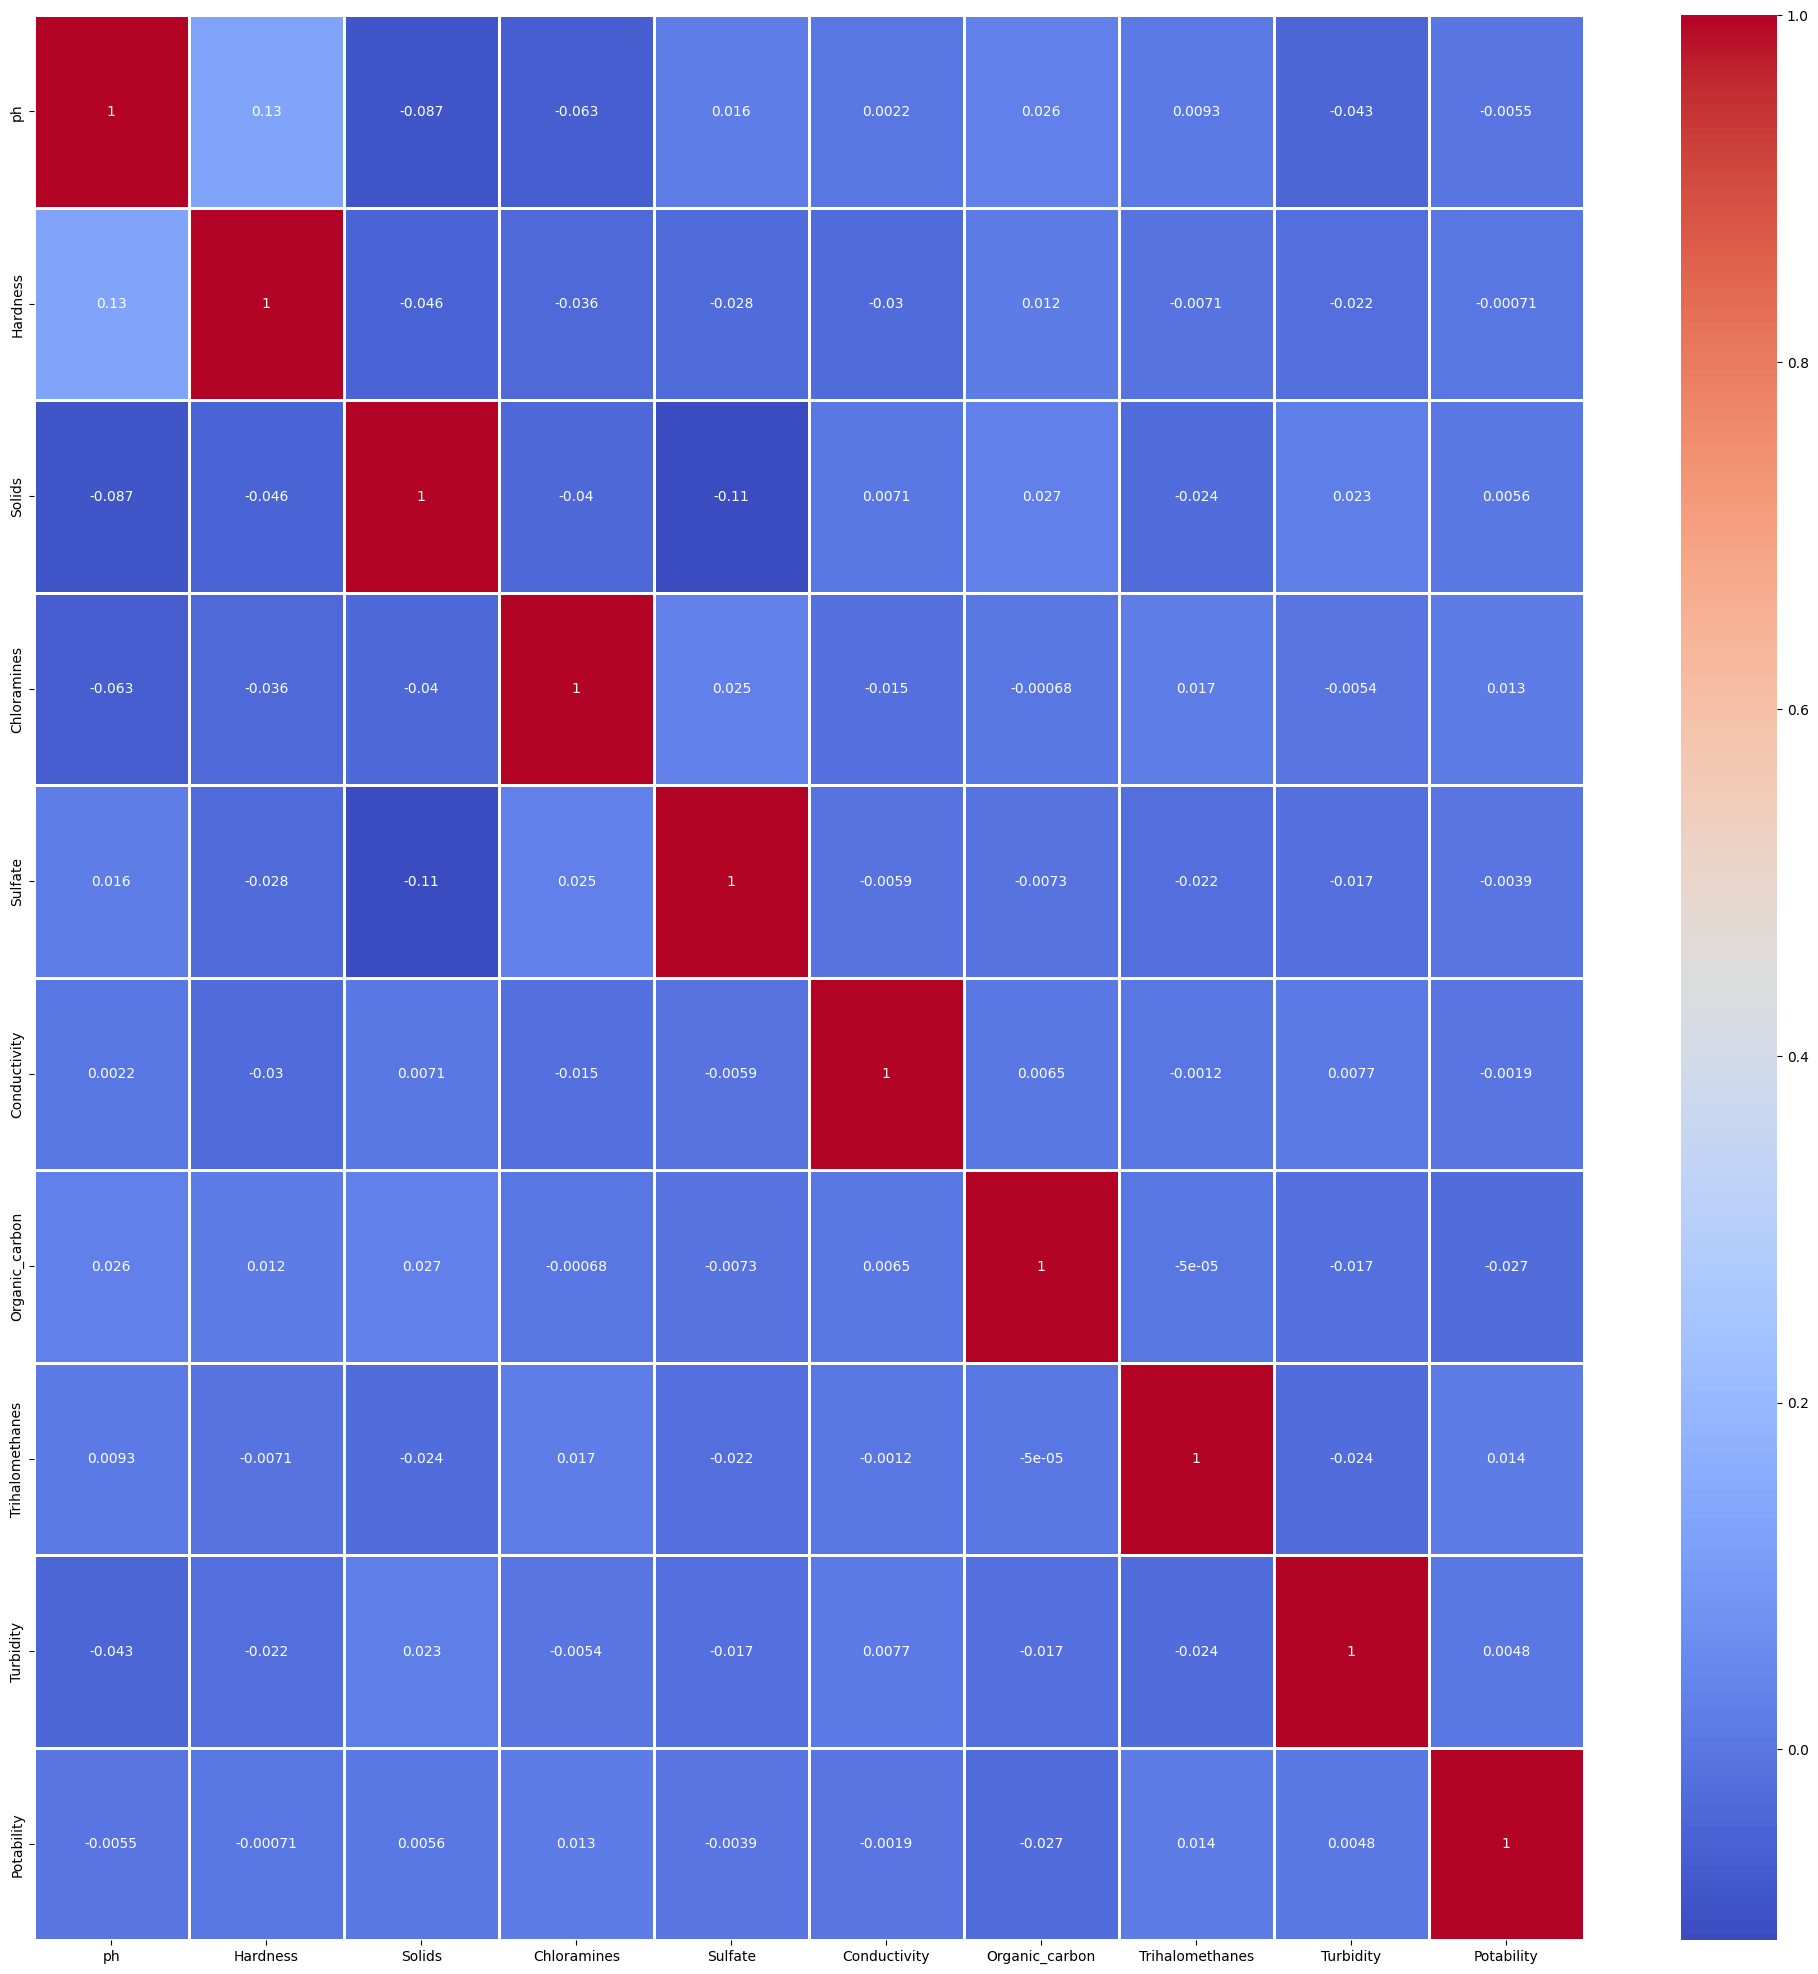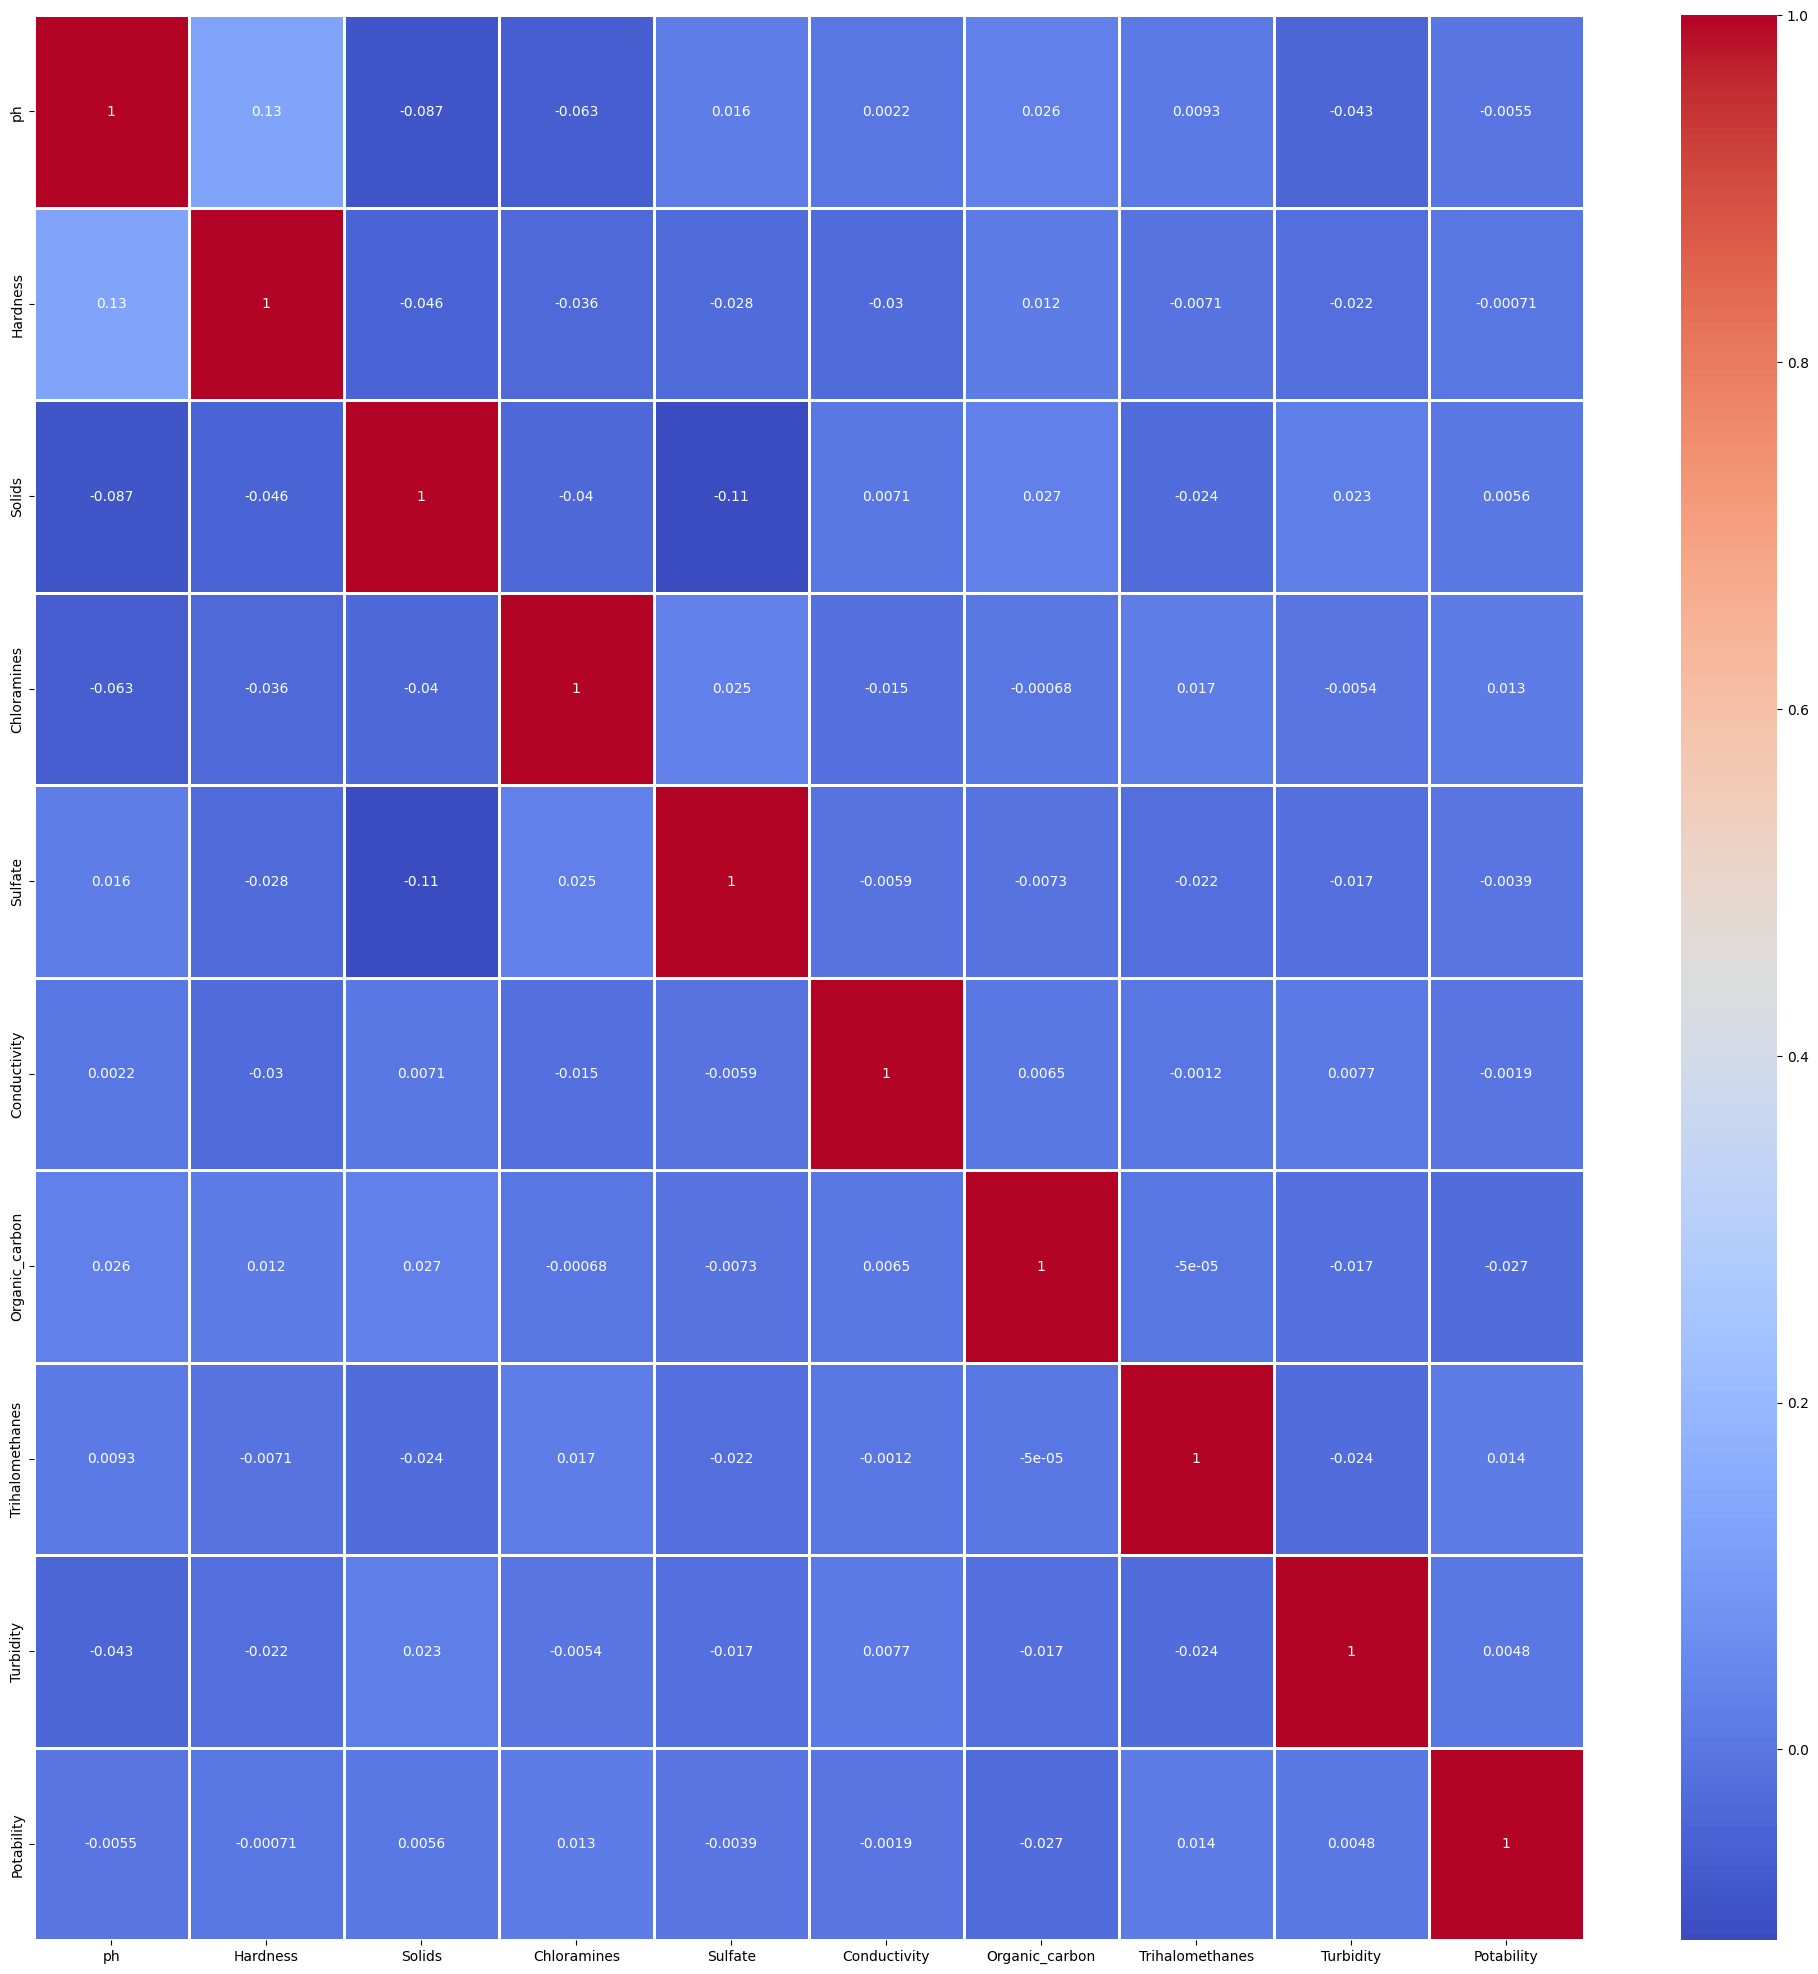)


all the independent variables have less than 10% correlattion with each other so we can't drop any variable

In [ ]:
### Multivariate analysis
#sns.pairplot(df ,  height=10 , size = 5 , hue = "Potability" )

In [ ]:
### splitting data into x and y
X = df.iloc[: , : -1]
y = df.iloc[ : , -1]v

Oversampling using SMOTE

In [ ]:
#from collections import Counter
#from imblearn.over_sampling import SMOTE

In [ ]:
#counter = Counter(y_train)
#print(f"before oversampling: {counter}")
#smt = SMOTE()
#X_train , y_train = smt.fit_resample(X_train , y_train)
#counter = Counter(y_train)
#print(f"after oversampling : {counter}")

Feature scaling

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_final = sc.fit_transform(X_train)
X_test_final = sc.transform(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score


In [ ]:
# Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
rf_classifier = RandomForestClassifier(n_estimators = 20, criterion = 'entropy', class_weight = "balanced_subsample",random_state = 51)
rf_classifier.fit(X_train_final, y_train)
y_pred = rf_classifier.predict(X_test_final)
accuracy_score(y_test, y_pred)

In [ ]:
0.635


In [ ]:
print(classification_report(y_test, y_pred))

In [ ]:
   precision    recall  f1-score   support

           0       0.66      0.86      0.75       497
           1       0.54      0.26      0.35       303

    accuracy                           0.64       800
   macro avg       0.60      0.56      0.55       800
weighted avg       0.61      0.64      0.60       800

In [ ]:
# XGBoost Classifier
from xgboost import XGBClassifier
xgb_classifier = XGBClassifier(random_state=0)
xgb_classifier.fit(X_train_final, y_train)
y_pred_xgb = xgb_classifier.predict(X_test_final)
accuracy_score(y_test, y_pred_xgb)

In [ ]:
0.62125

In [ ]:
print(classification_report(y_test, y_pred_xgb))


In [ ]:
   precision    recall  f1-score   support

           0       0.67      0.77      0.72       497
           1       0.50      0.38      0.43       303

    accuracy                           0.62       800
   macro avg       0.59      0.57      0.57       800
weighted avg       0.61      0.62      0.61       800

Support vector Machine

In [ ]:
 Support vector classifier
from sklearn.svm import SVC
svc_classifier = SVC(class_weight = "balanced" )
svc_classifier.fit(X_train_final, y_train)
y_pred_scv = svc_classifier.predict(X_test_final)
accuracy_score(y_test, y_pred_scv)

In [ ]:
0.6225

In [ ]:
print(classification_report(y_test, y_pred_scv))


In [ ]:
 precision    recall  f1-score   support

           0       0.70      0.69      0.70       497
           1       0.50      0.50      0.50       303

    accuracy                           0.62       800
   macro avg       0.60      0.60      0.60       800
weighted avg       0.62      0.62      0.62       800


In [ ]:
cm = confusion_matrix(y_test, y_pred_scv)
plt.title('Heatmap of Confusion Matrix', fontsize = 12)
sns.heatmap(cm, annot = True, fmt = "d")
plt.show()

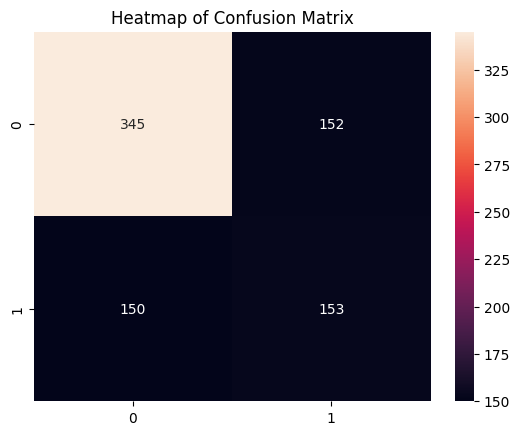

Hyperparameter Tuning with Support vector Machine

In [ ]:
# defining parameter range
param_grid = {'C': [0.1, 1, 10, 100, 200 , 400 , 600 , 800], 
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']}

from sklearn.model_selection import GridSearchCV

In [ ]:
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3)
  
# fitting the model for grid search
grid.fit(X_train_final, y_train)

In [ ]:
Fitting 5 folds for each of 40 candidates, totalling 200 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.628 total time=   0.2s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.630 total time=   0.2s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.630 total time=   0.1s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.630 total time=   0.1s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.627 total time=   0.1s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.628 total time=   0.1s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.630 total time=   0.1s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.630 total time=   0.1s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.630 total time=   0.1s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.627 total time=   0.1s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.628 total time=   0.1s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.630 total time=   0.1s
[CV 3/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.630 total time=   0.1s
[CV 4/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.630 total time=   0.1s
[CV 5/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.627 total time=   0.1s
[CV 1/5] END ....C=0.1, gamma=0.001, kernel=rbf;, score=0.628 total time=   0.1s
[CV 2/5] END ....C=0.1, gamma=0.001, kernel=rbf;, score=0.630 total time=   0.1s
[CV 3/5] END ....C=0.1, gamma=0.001, kernel=rbf;, score=0.630 total time=   0.0s
[CV 4/5] END ....C=0.1, gamma=0.001, kernel=rbf;, score=0.630 total time=   0.1s
[CV 5/5] END ....C=0.1, gamma=0.001, kernel=rbf;, score=0.627 total time=   0.1s
[CV 1/5] END ...C=0.1, gamma=0.0001, kernel=rbf;, score=0.628 total time=   0.1s
[CV 2/5] END ...C=0.1, gamma=0.0001, kernel=rbf;, score=0.630 total time=   0.1s
[CV 3/5] END ...C=0.1, gamma=0.0001, kernel=rbf;, score=0.630 total time=   0.1s
[CV 4/5] END ...C=0.1, gamma=0.0001, kernel=rbf;, score=0.630 total time=   0.1s
[CV 5/5] END ...C=0.1, gamma=0.0001, kernel=rbf;, score=0.627 total time=   0.1s
[CV 1/5] END ..........C=1, gamma=1, kernel=rbf;, score=0.647 total time=   0.1s
[CV 2/5] END ..........C=1, gamma=1, kernel=rbf;, score=0.625 total time=   0.1s
[CV 3/5] END ..........C=1, gamma=1, kernel=rbf;, score=0.627 total time=   0.1s
[CV 4/5] END ..........C=1, gamma=1, kernel=rbf;, score=0.609 total time=   0.1s
[CV 5/5] END ..........C=1, gamma=1, kernel=rbf;, score=0.622 total time=   0.1s
[CV 1/5] END ........C=1, gamma=0.1, kernel=rbf;, score=0.644 total time=   0.1s
[CV 2/5] END ........C=1, gamma=0.1, kernel=rbf;, score=0.649 total time=   0.1s
[CV 3/5] END ........C=1, gamma=0.1, kernel=rbf;, score=0.676 total time=   0.1s
[CV 4/5] END ........C=1, gamma=0.1, kernel=rbf;, score=0.651 total time=   0.1s
[CV 5/5] END ........C=1, gamma=0.1, kernel=rbf;, score=0.668 total time=   0.1s
[CV 1/5] END .......C=1, gamma=0.01, kernel=rbf;, score=0.628 total time=   0.1s
[CV 2/5] END .......C=1, gamma=0.01, kernel=rbf;, score=0.630 total time=   0.1s
[CV 3/5] END .......C=1, gamma=0.01, kernel=rbf;, score=0.630 total time=   0.1s
[CV 4/5] END .......C=1, gamma=0.01, kernel=rbf;, score=0.630 total time=   0.1s
[CV 5/5] END .......C=1, gamma=0.01, kernel=rbf;, score=0.627 total time=   0.1s
[CV 1/5] END ......C=1, gamma=0.001, kernel=rbf;, score=0.628 total time=   0.1s
[CV 2/5] END ......C=1, gamma=0.001, kernel=rbf;, score=0.630 total time=   0.1s
[CV 3/5] END ......C=1, gamma=0.001, kernel=rbf;, score=0.630 total time=   0.1s
[CV 4/5] END ......C=1, gamma=0.001, kernel=rbf;, score=0.630 total time=   0.1s
[CV 5/5] END ......C=1, gamma=0.001, kernel=rbf;, score=0.627 total time=   0.1s
[CV 1/5] END .....C=1, gamma=0.0001, kernel=rbf;, score=0.628 total time=   0.1s
[CV 2/5] END .....C=1, gamma=0.0001, kernel=rbf;, score=0.630 total time=   0.1s
[CV 3/5] END .....C=1, gamma=0.0001, kernel=rbf;, score=0.630 total time=   0.1s
[CV 4/5] END .....C=1, gamma=0.0001, kernel=rbf;, score=0.630 total time=   0.1s
[CV 5/5] END .....C=1, gamma=0.0001, kernel=rbf;, score=0.627 total time=   0.1s
[CV 1/5] END .........C=10, gamma=1, kernel=rbf;, score=0.610 total time=   0.1s
[CV 2/5] END .........C=10, gamma=1, kernel=rbf;, score=0.609 total time=   0.1s
[CV 3/5] END .........C=10, gamma=1, kernel=rbf;, score=0.609 total time=   0.1s
[CV 4/5] END .........C=10, gamma=1, kernel=rbf;, score=0.609 total time=   0.1s
[CV 5/5] END .........C=10, gamma=1, kernel=rbf;, score=0.627 total time=   0.1s
[CV 1/5] END .......C=10, gamma=0.1, kernel=rbf;, score=0.620 total time=   0.1s
[CV 2/5] END .......C=10, gamma=0.1, kernel=rbf;, score=0.643 total time=   0.1s
[CV 3/5] END .......C=10, gamma=0.1, kernel=rbf;, score=0.654 total time=   0.1s
[CV 4/5] END .......C=10, gamma=0.1, kernel=rbf;, score=0.633 total time=   0.1s
[CV 5/5] END .......C=10, gamma=0.1, kernel=rbf;, score=0.641 total time=   0.1s
[CV 1/5] END ......C=10, gamma=0.01, kernel=rbf;, score=0.647 total time=   0.1s
[CV 2/5] END ......C=10, gamma=0.01, kernel=rbf;, score=0.643 total time=   0.1s
[CV 3/5] END ......C=10, gamma=0.01, kernel=rbf;, score=0.651 total time=   0.1s
[CV 4/5] END ......C=10, gamma=0.01, kernel=rbf;, score=0.651 total time=   0.1s
[CV 5/5] END ......C=10, gamma=0.01, kernel=rbf;, score=0.654 total time=   0.1s
[CV 1/5] END .....C=10, gamma=0.001, kernel=rbf;, score=0.628 total time=   0.1s
[CV 2/5] END .....C=10, gamma=0.001, kernel=rbf;, score=0.630 total time=   0.1s
[CV 3/5] END .....C=10, gamma=0.001, kernel=rbf;, score=0.630 total time=   0.1s
[CV 4/5] END .....C=10, gamma=0.001, kernel=rbf;, score=0.630 total time=   0.1s
[CV 5/5] END .....C=10, gamma=0.001, kernel=rbf;, score=0.627 total time=   0.1s
[CV 1/5] END ....C=10, gamma=0.0001, kernel=rbf;, score=0.628 total time=   0.1s
[CV 2/5] END ....C=10, gamma=0.0001, kernel=rbf;, score=0.630 total time=   0.1s
[CV 3/5] END ....C=10, gamma=0.0001, kernel=rbf;, score=0.630 total time=   0.1s
[CV 4/5] END ....C=10, gamma=0.0001, kernel=rbf;, score=0.630 total time=   0.1s
[CV 5/5] END ....C=10, gamma=0.0001, kernel=rbf;, score=0.627 total time=   0.1s
[CV 1/5] END ........C=100, gamma=1, kernel=rbf;, score=0.610 total time=   0.2s
[CV 2/5] END ........C=100, gamma=1, kernel=rbf;, score=0.609 total time=   0.2s
[CV 3/5] END ........C=100, gamma=1, kernel=rbf;, score=0.609 total time=   0.1s
[CV 4/5] END ........C=100, gamma=1, kernel=rbf;, score=0.609 total time=   0.1s
[CV 5/5] END ........C=100, gamma=1, kernel=rbf;, score=0.627 total time=   0.1s
[CV 1/5] END ......C=100, gamma=0.1, kernel=rbf;, score=0.561 total time=   0.5s
[CV 2/5] END ......C=100, gamma=0.1, kernel=rbf;, score=0.641 total time=   0.6s
[CV 3/5] END ......C=100, gamma=0.1, kernel=rbf;, score=0.603 total time=   0.6s
[CV 4/5] END ......C=100, gamma=0.1, kernel=rbf;, score=0.614 total time=   0.5s
[CV 5/5] END ......C=100, gamma=0.1, kernel=rbf;, score=0.619 total time=   0.5s
[CV 1/5] END .....C=100, gamma=0.01, kernel=rbf;, score=0.650 total time=   0.1s
[CV 2/5] END .....C=100, gamma=0.01, kernel=rbf;, score=0.657 total time=   0.2s
[CV 3/5] END .....C=100, gamma=0.01, kernel=rbf;, score=0.668 total time=   0.2s
[CV 4/5] END .....C=100, gamma=0.01, kernel=rbf;, score=0.670 total time=   0.2s
[CV 5/5] END .....C=100, gamma=0.01, kernel=rbf;, score=0.673 total time=   0.2s
[CV 1/5] END ....C=100, gamma=0.001, kernel=rbf;, score=0.628 total time=   0.1s
[CV 2/5] END ....C=100, gamma=0.001, kernel=rbf;, score=0.630 total time=   0.1s
[CV 3/5] END ....C=100, gamma=0.001, kernel=rbf;, score=0.630 total time=   0.1s
[CV 4/5] END ....C=100, gamma=0.001, kernel=rbf;, score=0.630 total time=   0.1s
[CV 5/5] END ....C=100, gamma=0.001, kernel=rbf;, score=0.627 total time=   0.1s
[CV 1/5] END ...C=100, gamma=0.0001, kernel=rbf;, score=0.628 total time=   0.1s
[CV 2/5] END ...C=100, gamma=0.0001, kernel=rbf;, score=0.630 total time=   0.1s
[CV 3/5] END ...C=100, gamma=0.0001, kernel=rbf;, score=0.630 total time=   0.2s
[CV 4/5] END ...C=100, gamma=0.0001, kernel=rbf;, score=0.630 total time=   0.2s
[CV 5/5] END ...C=100, gamma=0.0001, kernel=rbf;, score=0.627 total time=   0.1s
[CV 1/5] END ........C=200, gamma=1, kernel=rbf;, score=0.610 total time=   0.2s
[CV 2/5] END ........C=200, gamma=1, kernel=rbf;, score=0.609 total time=   0.1s
[CV 3/5] END ........C=200, gamma=1, kernel=rbf;, score=0.609 total time=   0.1s
[CV 4/5] END ........C=200, gamma=1, kernel=rbf;, score=0.609 total time=   0.1s
[CV 5/5] END ........C=200, gamma=1, kernel=rbf;, score=0.627 total time=   0.1s
[CV 1/5] END ......C=200, gamma=0.1, kernel=rbf;, score=0.537 total time=   0.7s
[CV 2/5] END ......C=200, gamma=0.1, kernel=rbf;, score=0.617 total time=   0.7s
[CV 3/5] END ......C=200, gamma=0.1, kernel=rbf;, score=0.603 total time=   0.8s
[CV 4/5] END ......C=200, gamma=0.1, kernel=rbf;, score=0.606 total time=   0.7s
[CV 5/5] END ......C=200, gamma=0.1, kernel=rbf;, score=0.582 total time=   0.7s
[CV 1/5] END .....C=200, gamma=0.01, kernel=rbf;, score=0.647 total time=   0.2s
[CV 2/5] END .....C=200, gamma=0.01, kernel=rbf;, score=0.649 total time=   0.2s
[CV 3/5] END .....C=200, gamma=0.01, kernel=rbf;, score=0.673 total time=   0.2s
[CV 4/5] END .....C=200, gamma=0.01, kernel=rbf;, score=0.668 total time=   0.2s
[CV 5/5] END .....C=200, gamma=0.01, kernel=rbf;, score=0.668 total time=   0.2s
[CV 1/5] END ....C=200, gamma=0.001, kernel=rbf;, score=0.628 total time=   0.1s
[CV 2/5] END ....C=200, gamma=0.001, kernel=rbf;, score=0.633 total time=   0.1s
[CV 3/5] END ....C=200, gamma=0.001, kernel=rbf;, score=0.638 total time=   0.1s
[CV 4/5] END ....C=200, gamma=0.001, kernel=rbf;, score=0.633 total time=   0.1s
[CV 5/5] END ....C=200, gamma=0.001, kernel=rbf;, score=0.630 total time=   0.1s
[CV 1/5] END ...C=200, gamma=0.0001, kernel=rbf;, score=0.628 total time=   0.2s
[CV 2/5] END ...C=200, gamma=0.0001, kernel=rbf;, score=0.630 total time=   0.2s
[CV 3/5] END ...C=200, gamma=0.0001, kernel=rbf;, score=0.630 total time=   0.2s
[CV 4/5] END ...C=200, gamma=0.0001, kernel=rbf;, score=0.630 total time=   0.2s
[CV 5/5] END ...C=200, gamma=0.0001, kernel=rbf;, score=0.627 total time=   0.2s
[CV 1/5] END ........C=400, gamma=1, kernel=rbf;, score=0.610 total time=   0.1s
[CV 2/5] END ........C=400, gamma=1, kernel=rbf;, score=0.609 total time=   0.1s
[CV 3/5] END ........C=400, gamma=1, kernel=rbf;, score=0.609 total time=   0.1s
[CV 4/5] END ........C=400, gamma=1, kernel=rbf;, score=0.609 total time=   0.1s
[CV 5/5] END ........C=400, gamma=1, kernel=rbf;, score=0.627 total time=   0.2s
[CV 1/5] END ......C=400, gamma=0.1, kernel=rbf;, score=0.545 total time=   1.0s
[CV 2/5] END ......C=400, gamma=0.1, kernel=rbf;, score=0.579 total time=   1.1s
[CV 3/5] END ......C=400, gamma=0.1, kernel=rbf;, score=0.592 total time=   1.1s
[CV 4/5] END ......C=400, gamma=0.1, kernel=rbf;, score=0.587 total time=   1.0s
[CV 5/5] END ......C=400, gamma=0.1, kernel=rbf;, score=0.566 total time=   1.1s
[CV 1/5] END .....C=400, gamma=0.01, kernel=rbf;, score=0.623 total time=   0.4s
[CV 2/5] END .....C=400, gamma=0.01, kernel=rbf;, score=0.638 total time=   0.4s
[CV 3/5] END .....C=400, gamma=0.01, kernel=rbf;, score=0.673 total time=   0.4s
[CV 4/5] END .....C=400, gamma=0.01, kernel=rbf;, score=0.668 total time=   0.3s
[CV 5/5] END .....C=400, gamma=0.01, kernel=rbf;, score=0.654 total time=   0.4s
[CV 1/5] END ....C=400, gamma=0.001, kernel=rbf;, score=0.634 total time=   0.1s
[CV 2/5] END ....C=400, gamma=0.001, kernel=rbf;, score=0.641 total time=   0.1s
[CV 3/5] END ....C=400, gamma=0.001, kernel=rbf;, score=0.646 total time=   0.1s
[CV 4/5] END ....C=400, gamma=0.001, kernel=rbf;, score=0.638 total time=   0.2s
[CV 5/5] END ....C=400, gamma=0.001, kernel=rbf;, score=0.627 total time=   0.1s
[CV 1/5] END ...C=400, gamma=0.0001, kernel=rbf;, score=0.628 total time=   0.2s
[CV 2/5] END ...C=400, gamma=0.0001, kernel=rbf;, score=0.630 total time=   0.3s
[CV 3/5] END ...C=400, gamma=0.0001, kernel=rbf;, score=0.630 total time=   0.3s
[CV 4/5] END ...C=400, gamma=0.0001, kernel=rbf;, score=0.630 total time=   0.2s
[CV 5/5] END ...C=400, gamma=0.0001, kernel=rbf;, score=0.627 total time=   0.2s
[CV 1/5] END ........C=600, gamma=1, kernel=rbf;, score=0.610 total time=   0.1s
[CV 2/5] END ........C=600, gamma=1, kernel=rbf;, score=0.609 total time=   0.1s
[CV 3/5] END ........C=600, gamma=1, kernel=rbf;, score=0.609 total time=   0.1s
[CV 4/5] END ........C=600, gamma=1, kernel=rbf;, score=0.609 total time=   0.1s
[CV 5/5] END ........C=600, gamma=1, kernel=rbf;, score=0.627 total time=   0.1s
[CV 1/5] END ......C=600, gamma=0.1, kernel=rbf;, score=0.548 total time=   1.2s
[CV 2/5] END ......C=600, gamma=0.1, kernel=rbf;, score=0.558 total time=   1.3s
[CV 3/5] END ......C=600, gamma=0.1, kernel=rbf;, score=0.555 total time=   1.2s
[CV 4/5] END ......C=600, gamma=0.1, kernel=rbf;, score=0.587 total time=   1.2s
[CV 5/5] END ......C=600, gamma=0.1, kernel=rbf;, score=0.574 total time=   1.1s
[CV 1/5] END .....C=600, gamma=0.01, kernel=rbf;, score=0.628 total time=   0.5s
[CV 2/5] END .....C=600, gamma=0.01, kernel=rbf;, score=0.643 total time=   0.5s
[CV 3/5] END .....C=600, gamma=0.01, kernel=rbf;, score=0.665 total time=   0.6s
[CV 4/5] END .....C=600, gamma=0.01, kernel=rbf;, score=0.660 total time=   0.7s
[CV 5/5] END .....C=600, gamma=0.01, kernel=rbf;, score=0.660 total time=   0.7s
[CV 1/5] END ....C=600, gamma=0.001, kernel=rbf;, score=0.647 total time=   0.2s
[CV 2/5] END ....C=600, gamma=0.001, kernel=rbf;, score=0.638 total time=   0.2s
[CV 3/5] END ....C=600, gamma=0.001, kernel=rbf;, score=0.643 total time=   0.3s
[CV 4/5] END ....C=600, gamma=0.001, kernel=rbf;, score=0.646 total time=   0.3s
[CV 5/5] END ....C=600, gamma=0.001, kernel=rbf;, score=0.638 total time=   0.2s
[CV 1/5] END ...C=600, gamma=0.0001, kernel=rbf;, score=0.628 total time=   0.3s
[CV 2/5] END ...C=600, gamma=0.0001, kernel=rbf;, score=0.630 total time=   0.3s
[CV 3/5] END ...C=600, gamma=0.0001, kernel=rbf;, score=0.630 total time=   0.3s
[CV 4/5] END ...C=600, gamma=0.0001, kernel=rbf;, score=0.630 total time=   0.3s
[CV 5/5] END ...C=600, gamma=0.0001, kernel=rbf;, score=0.627 total time=   0.3s
[CV 1/5] END ........C=800, gamma=1, kernel=rbf;, score=0.610 total time=   0.1s
[CV 2/5] END ........C=800, gamma=1, kernel=rbf;, score=0.609 total time=   0.1s
[CV 3/5] END ........C=800, gamma=1, kernel=rbf;, score=0.609 total time=   0.2s
[CV 4/5] END ........C=800, gamma=1, kernel=rbf;, score=0.609 total time=   0.1s
[CV 5/5] END ........C=800, gamma=1, kernel=rbf;, score=0.627 total time=   0.1s
[CV 1/5] END ......C=800, gamma=0.1, kernel=rbf;, score=0.543 total time=   1.2s
[CV 2/5] END ......C=800, gamma=0.1, kernel=rbf;, score=0.539 total time=   1.4s
[CV 3/5] END ......C=800, gamma=0.1, kernel=rbf;, score=0.550 total time=   1.3s
[CV 4/5] END ......C=800, gamma=0.1, kernel=rbf;, score=0.558 total time=   1.2s
[CV 5/5] END ......C=800, gamma=0.1, kernel=rbf;, score=0.571 total time=   1.2s
[CV 1/5] END .....C=800, gamma=0.01, kernel=rbf;, score=0.628 total time=   0.6s
[CV 2/5] END .....C=800, gamma=0.01, kernel=rbf;, score=0.638 total time=   0.6s
[CV 3/5] END .....C=800, gamma=0.01, kernel=rbf;, score=0.670 total time=   0.8s
[CV 4/5] END .....C=800, gamma=0.01, kernel=rbf;, score=0.649 total time=   0.6s
[CV 5/5] END .....C=800, gamma=0.01, kernel=rbf;, score=0.657 total time=   0.6s
[CV 1/5] END ....C=800, gamma=0.001, kernel=rbf;, score=0.647 total time=   0.2s
[CV 2/5] END ....C=800, gamma=0.001, kernel=rbf;, score=0.638 total time=   0.1s
[CV 3/5] END ....C=800, gamma=0.001, kernel=rbf;, score=0.654 total time=   0.2s
[CV 4/5] END ....C=800, gamma=0.001, kernel=rbf;, score=0.649 total time=   0.2s
[CV 5/5] END ....C=800, gamma=0.001, kernel=rbf;, score=0.654 total time=   0.2s
[CV 1/5] END ...C=800, gamma=0.0001, kernel=rbf;, score=0.628 total time=   0.2s
[CV 2/5] END ...C=800, gamma=0.0001, kernel=rbf;, score=0.630 total time=   0.3s
[CV 3/5] END ...C=800, gamma=0.0001, kernel=rbf;, score=0.630 total time=   0.3s
[CV 4/5] END ...C=800, gamma=0.0001, kernel=rbf;, score=0.630 total time=   0.3s
[CV 5/5] END ...C=800, gamma=0.0001, kernel=rbf;, score=0.627 total time=   0.3s

In [ ]:
GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 200, 400, 600, 800],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In a Jupyter environment, please rerun this cell to show the HTML representation or trust the notebook.
On GitHub, the HTML representation is unable to render, please try loading this page with nbviewer.org.

In [ ]:
 print best parameter after tuning
print(grid.best_params_)
  
# print how our model looks after hyper-parameter tuning
print(grid.best_estimator_)

In [ ]:
{'C': 100, 'gamma': 0.01, 'kernel': 'rbf'}
SVC(C=100, gamma=0.01)

In [ ]:
# Support vector classifier
from sklearn.svm import SVC
svc_classifier = SVC(class_weight = "balanced"  , C=100, gamma=0.01)
svc_classifier.fit(X_train_final, y_train)
y_pred_scv = svc_classifier.predict(X_test_final)
accuracy_score(y_test, y_pred_scv)

In [ ]:
0.6325

In [ ]:
print(classification_report(y_test, y_pred_xgb))

In [ ]:
  precision    recall  f1-score   support

           0       0.67      0.77      0.72       497
           1       0.50      0.38      0.43       303

    accuracy                           0.62       800
   macro avg       0.59      0.57      0.57       800
weighted avg       0.61      0.62      0.61       800


In [ ]:
cm = confusion_matrix(y_test, y_pred_scv)
plt.title('Heatmap of Confusion Matrix', fontsize = 12)
sns.heatmap(cm, annot = True , fmt = "d")
plt.show()

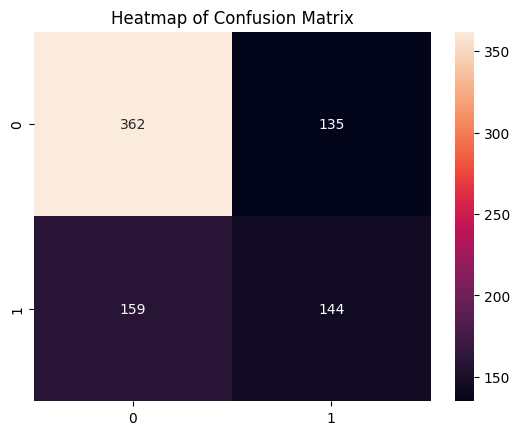

In [ ]:
## Pickle
from sklearn.svm import SVC
import pickle

# save model
pickle.dump(svc_classifier, open('model.pkl', 'wb'))

# load model
water_quality_model = pickle.load(open('model.pkl', 'rb'))

# predict the output
y_pred =water_quality_model.predict(X_test_final)

# confusion matrix
print('Confusion matrix of Support vector Machine : \n',confusion_matrix(y_test, y_pred),'\n')
Confusion matrix of Support vector Machine : 
 [[362 135]
 [159 144]] 
